# Tutorial YAXArraysToolbox.jl / Basic Operations

## Libraries

In [1]:
using Pkg
# the path where you have the Manifest.toml and Project.toml 
Pkg.activate("/Net/Groups/BGI/people/dpabon/nfdi4earth_oemc")

  Activating project at `/Net/Groups/BGI/people/dpabon/nfdi4earth_oemc`


In [2]:
using YAXArrays, YAXArraysToolbox, CairoMakie, GeoMakie, Statistics, Zarr

## Data

We will use the Earth System Datacube.

In [3]:
esds = open_dataset("https://s3.bgc-jena.mpg.de:9000/esdl-esdc-v2.1.1/esdc-8d-0.25deg-184x90x90-2.1.1.zarr")
esdc = Cube(esds)

YAXArray with the following dimensions
lon                 Axis with 1440 Elements from -179.875 to 179.875
lat                 Axis with 720 Elements from 89.875 to -89.875
time                Axis with 1840 Elements from 1979-01-05T00:00:00 to 2018-12-31T00:00:00
Variable            Axis with 69 elements: leaf_area_index sensible_heat .. snow_sublimation Rg 
units: W m-2
Total size: 490.37 GB


## Basic Functions

### Plot time

In [7]:
?plot_time

search: plot_time



# Plot time

The function allow to plot the time series of a given variables in a cube or all the variables present in a cube. As is expected that cubes contain spatial dimensions the spatial dimensions are collapsed using a function e.g., estimating the mean of the variable using the pixels of a certain area for each time step.

## Arguments:

  * `cube_in` YAXArray Cube.
  * `time_axis`: String. Name of the time axis.
  * `var_axis`: String. Name of the axis containing the variables.
  * `var`: String or nothing. Name of the variable to be plotted. If nothing all the variables presented in the cube are plotted.
  * `lat_axis`: String. Name of the latitude axis.
  * `lon_axis`: String. Name of the longitute axis.
  * `fun`: String. Name of the function used to collapse the spatial dimensions. It must be "median", "mean", "std", "var", "sum", "quant", "min", or "max".
  * `p`: Float64. in the interval [0,1]. If `fun=quant` p is the value of the quantile.
  * `resolution`: Tuple. Plot resolution. By default `resolution = (600, 400)`.
  * `ncol`: Number of plots by column. By default `ncol = 1`.
  * `nrow`: Number of plots by row. By default `ncol = 1`.
  * `showprog`: Boolean. Progress Bar.
  * `max_cache`: String. Maximum cache to read the data. It must be in MB e.g. "100MB" or in GB "10GB".

## Examples

```julia
cube_in = open_dataset(
    "https://s3.bgc-jena.mpg.de:9000/esdl-esdc-v2.1.1/esdc-8d-0.25deg-1x720x1440-2.1.1.zarr",
)

cube_in = Cube(cube_in)
cube_in.Variable
cube_in = cube_in[
    lon = (-9.0, 0.0),
    lat = (35, 40),
    time = (Date(2010), Date(2014)),
    Variable = ["leaf_area_index", "sensible_heat"],
]

plot_time(
    cube_in;
    time_axis = "time",
    var_axis = "Variable",
    lon_axis = "lon",
    lat_axis = "lat",
    var = nothing,
    fun = "median",
    resolution = (900, 600),
    p = 0.2,
    showprog = true,
    max_cache = "100MB",
    ncol = 2
)

plot_time(
    cube_in;
    time_axis = "time",
    var_axis = "Variable",
    lon_axis = "lon",
    lat_axis = "lat",
    var = "sensible_heat",
    fun = "median",
    p = 0.2,
    showprog = true,
    max_cache = "100MB",
)
```


In this case,this case we will use the time_plot function to perform this operation and see the time series of different variables for South-America. 

In [8]:
cube_to_plot = esdc[
    lon = (-86, -35),
    lat = (-56, 14),
    time = (Date(2010), Date(2014)),
    Variable = ["leaf_area_index", "sensible_heat"],
]

YAXArray with the following dimensions
lon                 Axis with 204 Elements from -85.875 to -35.125
lat                 Axis with 280 Elements from 13.875 to -55.875
time                Axis with 184 Elements from 2010-01-05T00:00:00 to 2013-12-31T00:00:00
Variable            Axis with 2 elements: leaf_area_index sensible_heat 
units: W m-2
Total size: 80.19 MB


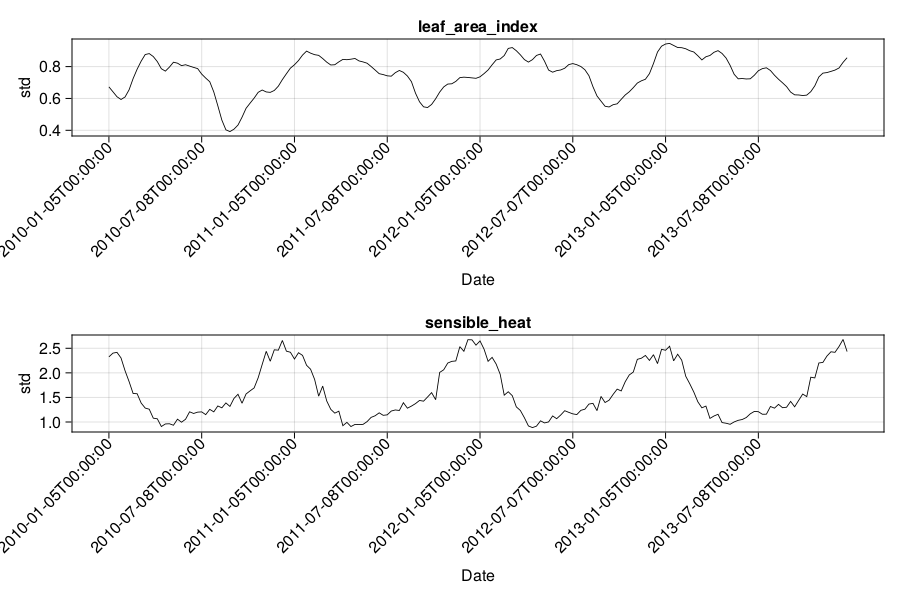

In [9]:
plot_time(cube_to_plot; time_axis = "time", var_axis = "Variable", lon_axis = "lon", lat_axis = "lat", var = nothing, fun = "std", resolution = (900, 600), p = 0.2, showprog = true, max_cache = "1GB",ncol = 1, nrow=2)

By default, the function will plot the time series of all the variables presented in the cube. But we can also plot a specific variable.

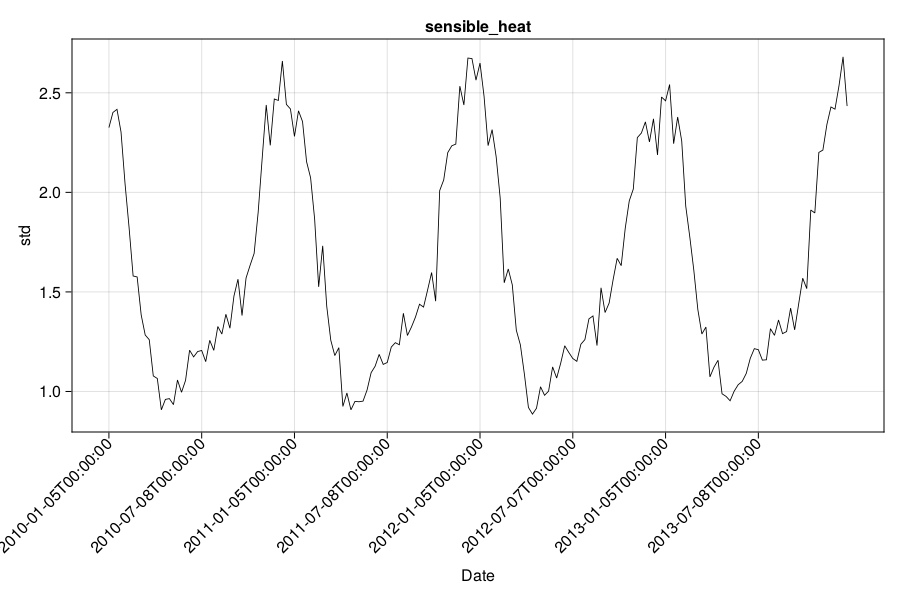

In [10]:
plot_time(cube_to_plot; time_axis = "time", var_axis = "Variable", lon_axis = "lon", lat_axis = "lat", var = "sensible_heat", fun = "std", resolution = (900, 600), p = 0.2, showprog = true, max_cache = "1GB",ncol = 1, nrow=2)

Even more, we can plot all the metrics available in the function for a variable.

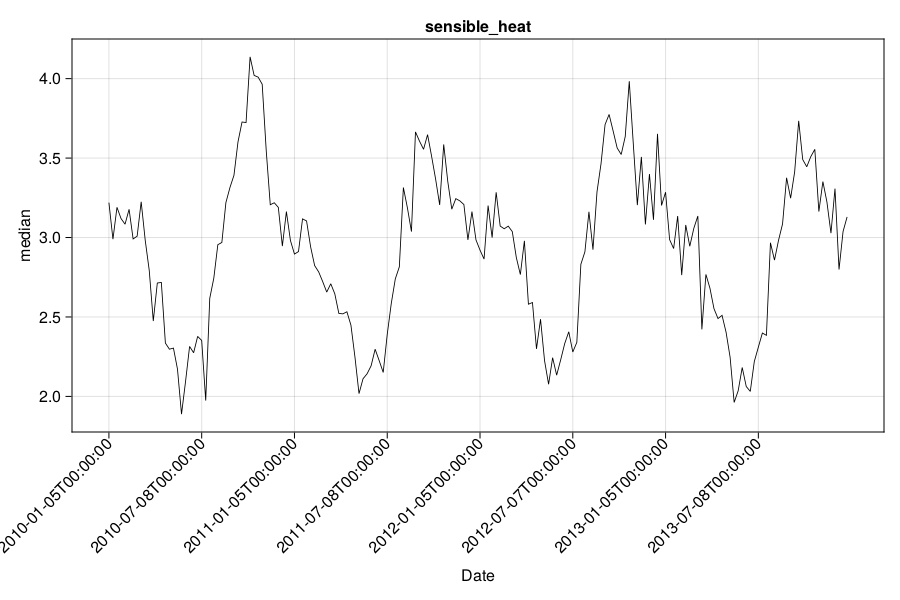

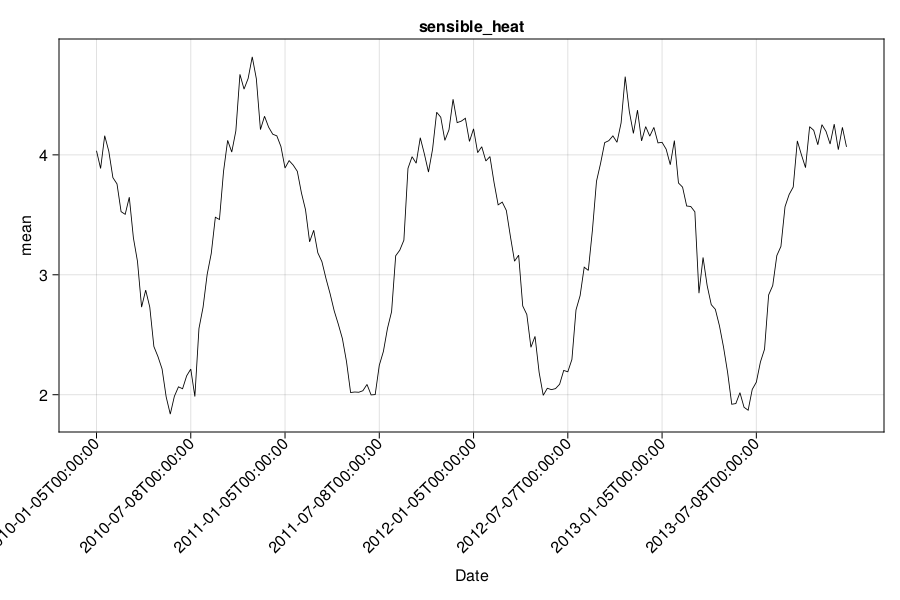

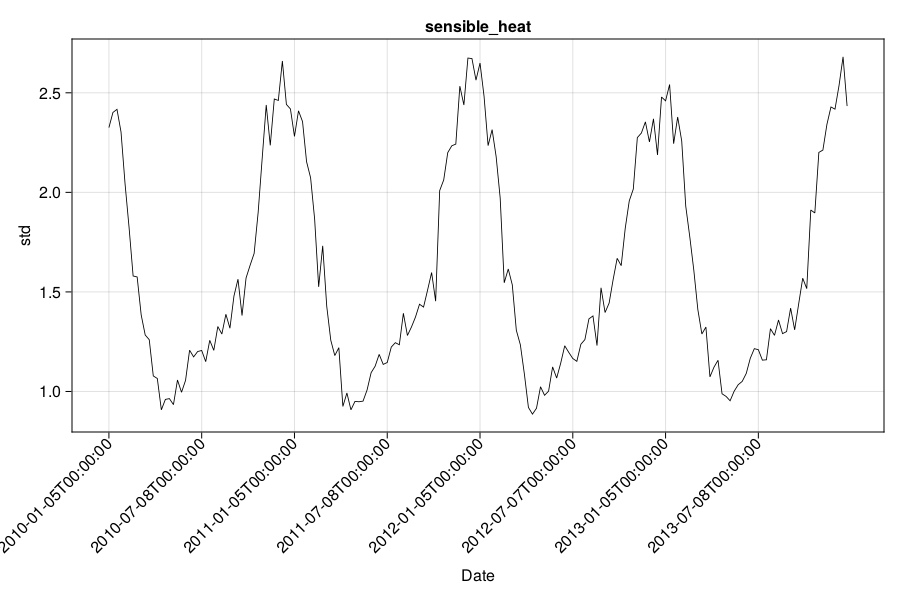

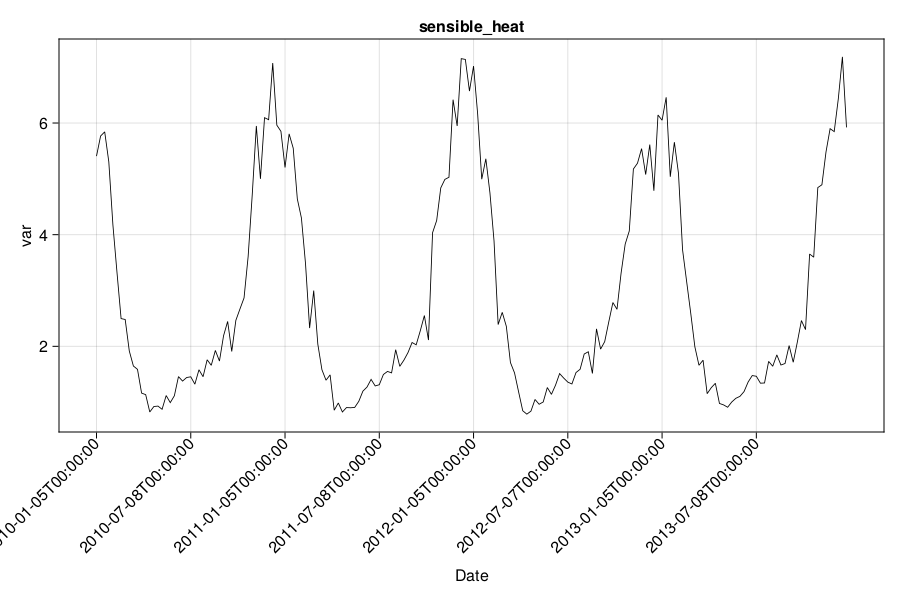

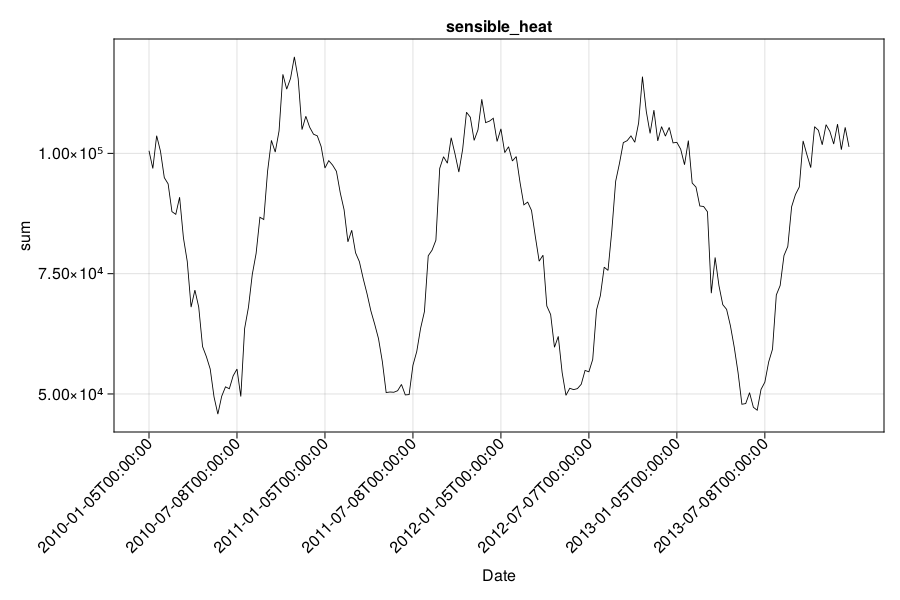

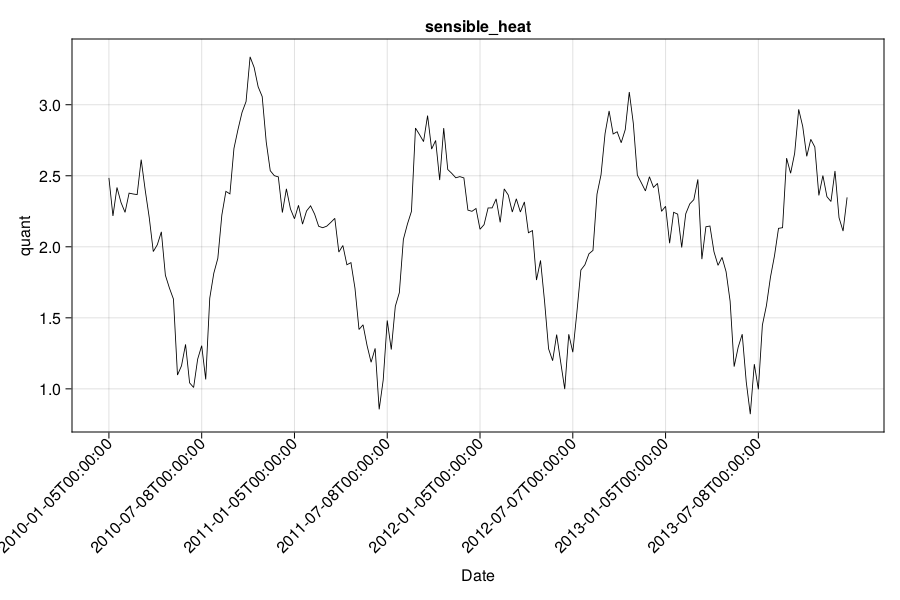

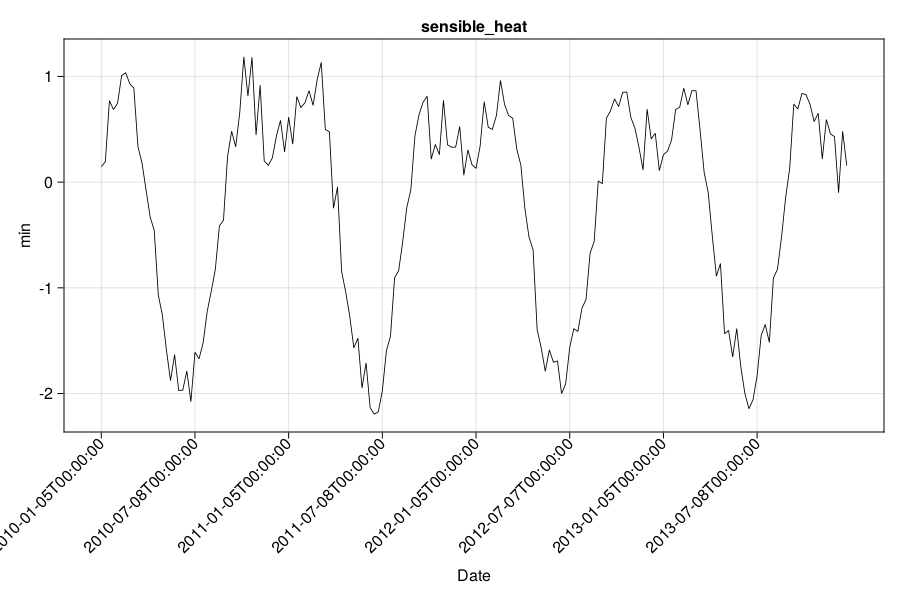

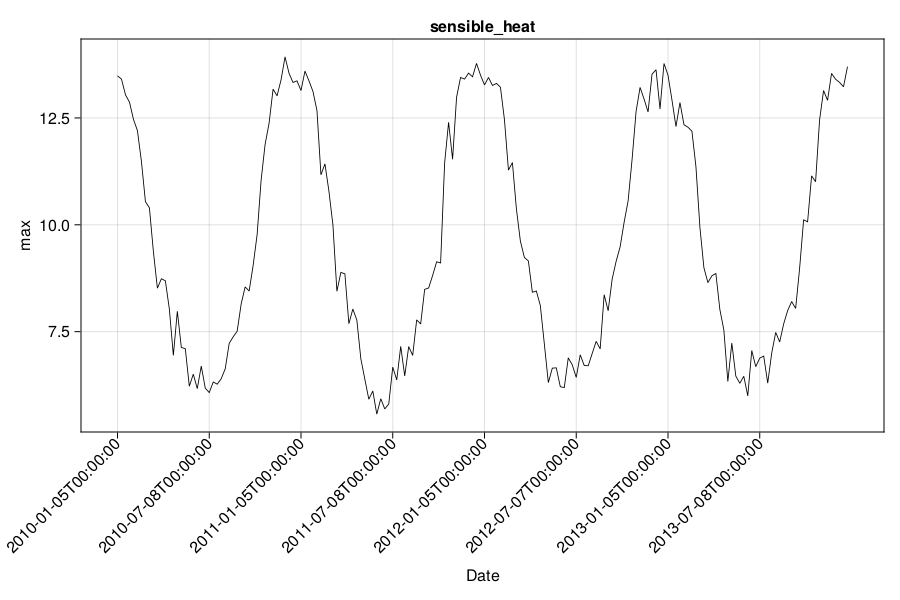

In [11]:
metrics = [ "median", "mean", "std", "var", "sum", "quant", "min", "max"]

for i in eachindex(metrics)
    
    temp = plot_time(cube_to_plot; time_axis = "time", var_axis = "Variable", lon_axis = "lon", lat_axis = "lat", var = "sensible_heat", fun = metrics[i], resolution = (900, 600), p = 0.2, showprog = true, max_cache = "1GB",ncol = 1, nrow=2)
    display(temp)
    
end

### Plot space

In [15]:
?plot_space

search: plot_space



# Plot Space/Maps

## Arguments

  * `cube_in`: YAXArray Cube.
  * `time_axis`: String. Name of the time axis.
  * `var_axis`: String. Name of the axis containing the variables.
  * `var`: String or nothing. Name of the variable to be plotted. If nothing all the variables presented in the cube are plotted.
  * `lat_axis`: String. Name of the latitude axis.
  * `lon_axis`: String. Name of the longitute axis.
  * `fun`: String. Name of the function used to collapse the spatial dimensions. It must be "median", "mean", "std", "var", "sum", "quant", "min", or "max".
  * `p`: Float64. in the interval [0,1]. If `fun=quant` p is the value of the quantile.
  * `colormap`: Color Map. By default: `colormap = Reverse(:batlow)`
  * `resolution`: Plot resolution. By default `resolution = (800, 300)`.
  * `ncol`: Number of plots by column. By default `ncol = 1`.
  * `nrow`: Number of plots by row. By default `ncol = 1`.
  * `showprog`: Boolean. Progress Bar.
  * `max_cache`: String. Maximum cache to read the data. It must be in MB e.g. "100MB" or in GB "10GB".

## Examples

```julia

cube_in = open_dataset(
    "https://s3.bgc-jena.mpg.de:9000/esdl-esdc-v2.1.1/esdc-8d-0.25deg-1x720x1440-2.1.1.zarr",
)

cube_in = Cube(cube_in)


cube_in = cube_in[
    lon = (-9.0, 0.0),
    lat = (35, 40),
    time = (Date(2010), Date(2014)),
    Variable = ["leaf_area_index", "sensible_heat"],
]

plot_space(cube_in; time_axis = "time", resolution = (900, 600), var_axis = "Variable", var =  "leaf_area_index", fun = "median")


metric = ["median", "mean", "std", "var", "sum", "quant", "min", "max"]


for i in eachindex(metric)
    println(metric[i])
    plot_space(
        cube_in;
        time_axis = "time",
        var_axis = "Variable",
        lon_axis = "lon",
        lat_axis = "lat",
        var = "sensible_heat",
        fun = metric[i],
        p = 0.2,
        showprog = true,
        max_cache = "100MB",
    )
end



plot_space(
    cube_in;
    time_axis = "time",
    var_axis = "Variable",
    lon_axis = "lon",
    lat_axis = "lat",
    var = nothing,
    fun = "median",
    resolution = (1200, 600),
    p = 0.2,
    showprog = true,
    max_cache = "100MB",
    ncol = 2,
)

```


In [19]:
cube_to_plot = esdc[
    lon = (-86, -34),
    lat = (-56, 14),
    time = (Date(2010), Date(2014)),
    Variable = ["leaf_area_index", "sensible_heat"],
]

YAXArray with the following dimensions
lon                 Axis with 208 Elements from -85.875 to -34.125
lat                 Axis with 280 Elements from 13.875 to -55.875
time                Axis with 184 Elements from 2010-01-05T00:00:00 to 2013-12-31T00:00:00
Variable            Axis with 2 elements: leaf_area_index sensible_heat 
units: W m-2
Total size: 81.76 MB


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


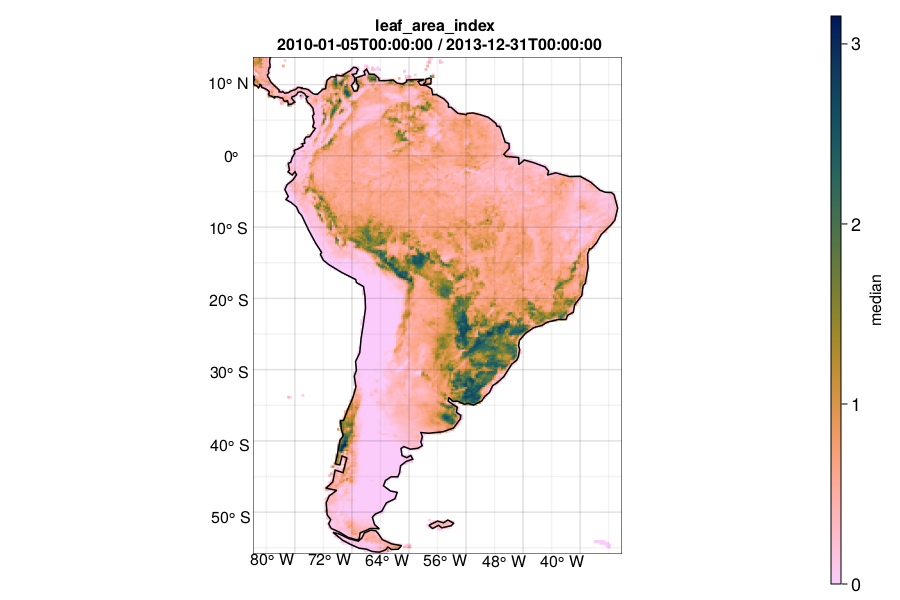

In [20]:
plot_space(cube_to_plot; time_axis = "time", resolution = (900, 600), var_axis = "Variable", var =  "leaf_area_index", fun = "median")

It is also possible to plot all the variables presented in the cube when var = nothing.

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


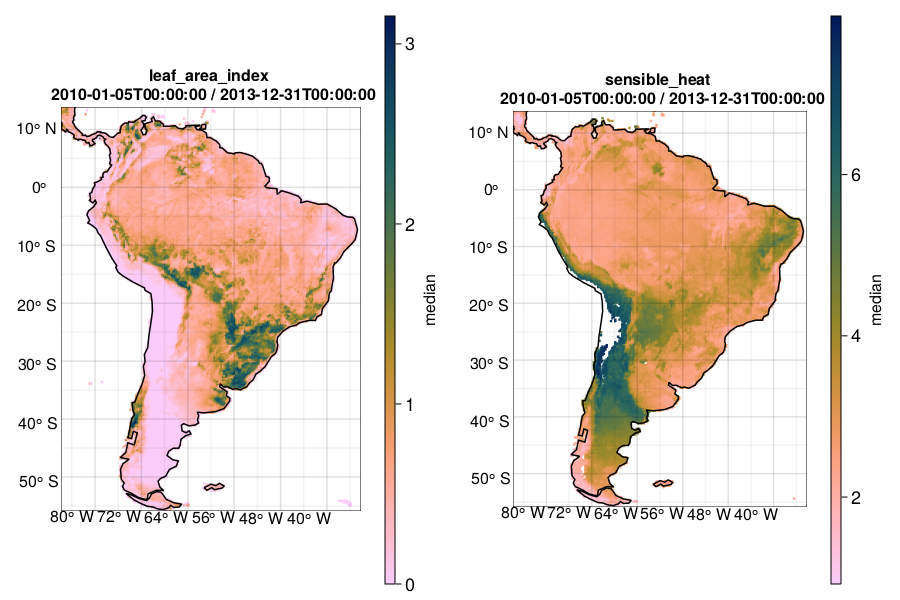

In [24]:
plot_space(cube_to_plot; time_axis = "time", resolution = (900, 600), var_axis = "Variable", var=nothing, ncol=2, nrow = 1, fun = "median")

It is also possible to compute all the metrics. As shown in the following example:

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


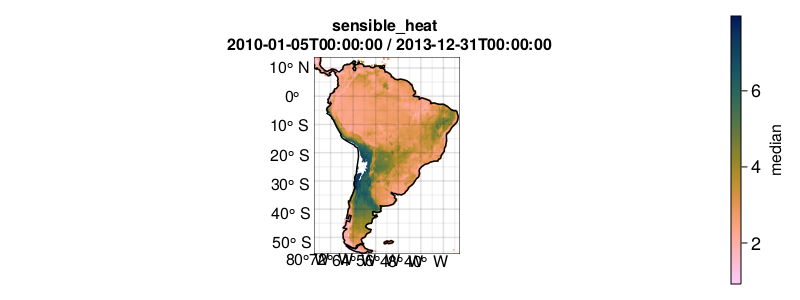

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


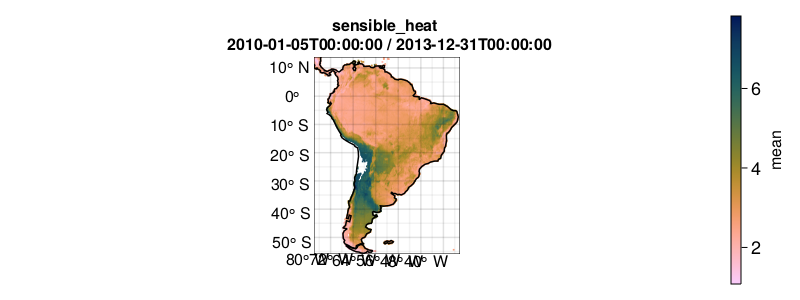

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


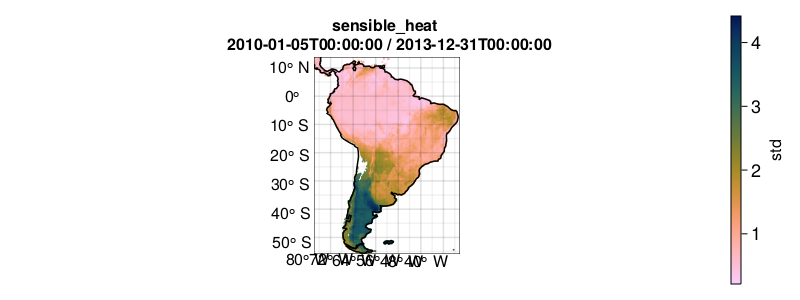

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


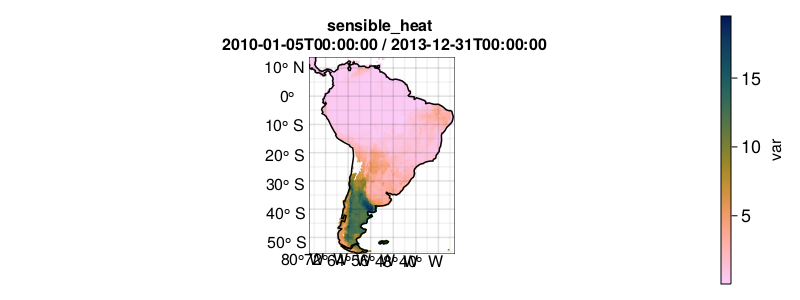

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


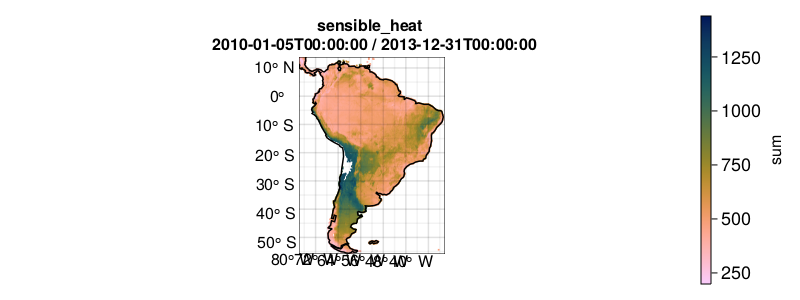

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


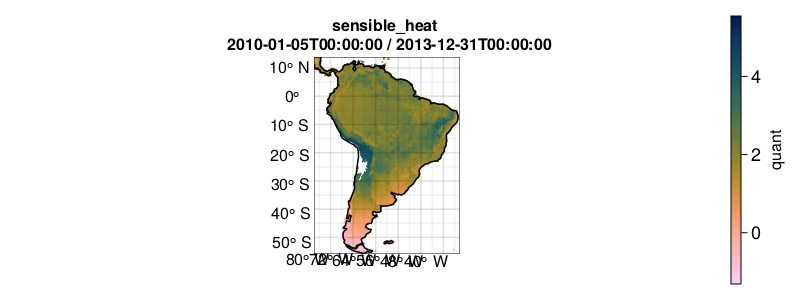

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


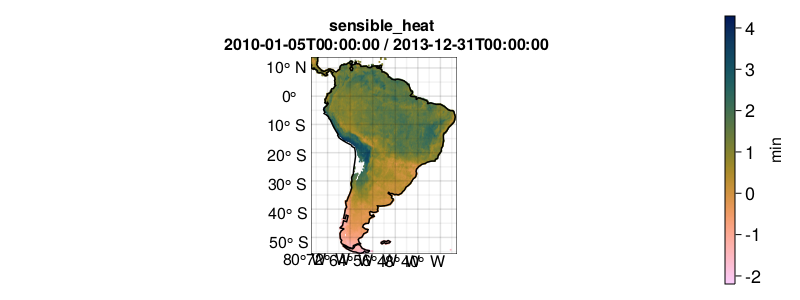

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


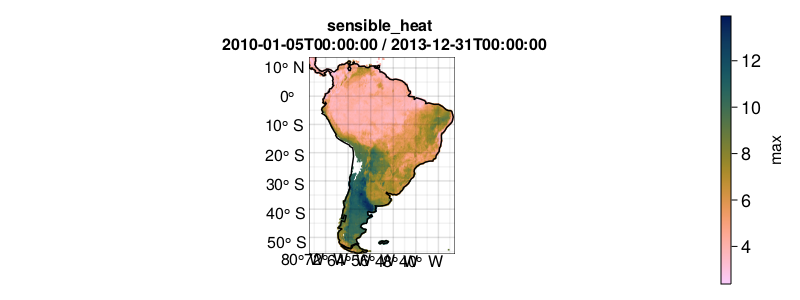

In [21]:
metric = ["median", "mean", "std", "var", "sum", "quant", "min", "max"]


for i in eachindex(metric)
    display(plot_space(cube_to_plot; time_axis = "time", var_axis = "Variable", lon_axis = "lon", lat_axis = "lat", var = "sensible_heat", fun = metric[i], p = 0.2, showprog = true, max_cache = "100MB"))
end

### Aggregate by time

In [4]:
?aggregate_time

search: aggregate_time



# Aggregate by time

## Arguments:

  * `cube_in` YAXArray Cube.
  * `time_axis`: String. Name of the time axis.
  * `new_resolution`: String. New temporal resolution can be `"day"`, `"month"`, `"year"`.
  * `new_time_step`: Int64. Time step to be computed in the new time series. e.g. `new_resolution="day", new_time_step=8` will compute the function each 8 days. The new time dimension will only contain the days corresponding to the 8th day.
  * `fun`: String. Function to be applied to aggregate the time. It can be "median", "mean", "std", "var", "sum", "quant", "min", "max".
  * `p`: Float64 in the interval [0,1]. If `fun=quant` p is the value of the quantile.
  * `skipMissing`: Boolean. Skip missing values when aggregating the data. If all values are missing, NaN is returned.
  * `skipnan`: Boolean. Skip NaN values when aggregating the data. If all values are NaN, NaN is returned.
  * `showprog`: Boolean. Progress Bar.
  * `max_cache`: String. Maximum cache to read the data. It must be in MB e.g. "100MB" or in GB "10GB".

## Examples

```julia

esds = open_dataset("https://s3.bgc-jena.mpg.de:9000/esdl-esdc-v2.1.1/esdc-8d-0.25deg-184x90x90-2.1.1.zarr")
esdc = Cube(esds)

# Estimating the monthly LAI

lai_month = aggregate_time(esdc[Variable = "leaf_area_index"]; time_axis = "time", new_resolution = "month", new_time_step=1, fun="mean", p=nothing, skipMissing=true, skipnan=true, showprog=true, max_cache="1GB")

```


In this case, we will compute the monthly mean of the Leaf Area Index.

In [5]:
lai_month = aggregate_time(esdc[Variable = "leaf_area_index"]; time_axis = "time", new_resolution = "month", new_time_step=1, fun="mean", p=nothing, skipMissing=true, skipnan=true, showprog=true, max_cache="1GB")

Progress: 100%|█████████████████████████████████████████| Time: 0:02:22


YAXArray with the following dimensions
time                Axis with 480 Elements from 1979-01-01T00:00:00 to 2018-12-01T00:00:00
lon                 Axis with 1440 Elements from -179.875 to 179.875
lat                 Axis with 720 Elements from 89.875 to -89.875
Total size: 1.85 GB


In [6]:
lai_month.time

480-element RangeAxis{DateTime, :time, Vector{DateTime}}:
 1979-01-01T00:00:00
 1979-02-01T00:00:00
 1979-03-01T00:00:00
 1979-04-01T00:00:00
 1979-05-01T00:00:00
 1979-06-01T00:00:00
 1979-07-01T00:00:00
 1979-08-01T00:00:00
 1979-09-01T00:00:00
 1979-10-01T00:00:00
 1979-11-01T00:00:00
 1979-12-01T00:00:00
 1980-01-01T00:00:00
 ⋮
 2018-01-01T00:00:00
 2018-02-01T00:00:00
 2018-03-01T00:00:00
 2018-04-01T00:00:00
 2018-05-01T00:00:00
 2018-06-01T00:00:00
 2018-07-01T00:00:00
 2018-08-01T00:00:00
 2018-09-01T00:00:00
 2018-10-01T00:00:00
 2018-11-01T00:00:00
 2018-12-01T00:00:00

In this case, the new time axis now only contains 480 values, one per month!

### Masking based on time

The ```masking_time()``` function allows the user to mask the values of a variable using the time series of the same or a different variable.

In [12]:
?masking_time

search: masking_time



# Masking using time dimension.

The function implements two methods:

1. Masking based on a threshold value for one of the variables presented in the cube. e.g., masking the values of all the variables presented in the cube where radiation is lower than X.
2. Masking based on the quantile threshold, where the quantile is estimated using the time series for each one of the variables presented in the cube.

The masked vales are set as `NaN`.

## Arguments:

  * `cube_in` YAXArray Cube.
  * `time_axis`: String. Name of the time axis.
  * `var_axis`: String. Name of the axis containing the variables.
  * `var_mask`: String or nothing. Name of the variable to be used to mask the other variables. If String `val` must be an Int64 or Float64 number. If nothing, `val` must be nothing and `p` must be a Float64 in the interval [0,1].
  * `val`: Float64 or nothing. The value of the threshold in `var_mask` to be used to mask all the variables in the cube. If `var_mask = nothing` then, `val=nothing`
  * `p`: Float64 or nothing. Quantile value used as a threshold to mask the variables.
  * `comp`: String. Standard comparison operation between the threshold value and each one of the elements. `comp` Must be one of the following: "==", "!=" "<", "<=", ">", ">=".
  * `showprog`: Boolean. Progress Bar.
  * `max_cache`: String. Maximum cache to read the data. It must be in MB e.g. "100MB" or in GB "10GB".

## Examples

```julia
using YAXArrays, Statistics, Zarr, NetCDF, YAXArraysToolbox

esds = open_dataset(
    "https://s3.bgc-jena.mpg.de:9000/esdl-esdc-v2.1.1/esdc-8d-0.25deg-184x90x90-2.1.1.zarr",
)
esdc = Cube(esds)

esdc_small = esdc[
    lon = (-86, -35),
    lat = (-56, 14),
    time = (Date(2010), Date(2014)),
    Variable = ["leaf_area_index", "sensible_heat", "potential_evaporation"],
]

test = masking_time(
    esdc_small;
    time_axis = "time",
    var_axis = "Variable",
    var_mask = "leaf_area_index",
    val = 0.2,
    comp = "<",
    showprog = true,
    max_cache = "1GB",
)

plot_time(esdc_small; time_axis="time", var_axis="Variable", var = "leaf_area_index", lat_axis = "lat", lon_axis="lon", fun = "min")

plot_time(test; time_axis="time", var_axis="Variable", var = "leaf_area_index", lat_axis = "lat", lon_axis="lon", fun = "min")
```


In the following example we will mask the values of all the variables when LAI < 0.2.

Progress: 100%|█████████████████████████████████████████| Time: 0:00:09


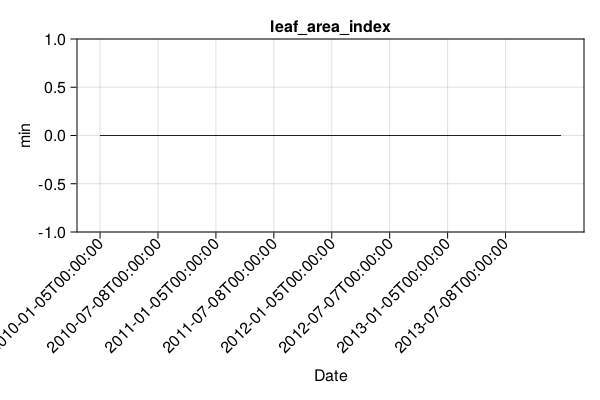

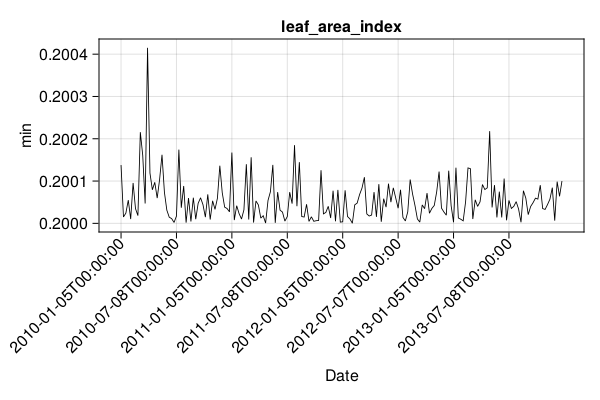

CairoMakie.Screen{IMAGE}


In [13]:
esdc_small = esdc[
    lon = (-86, -34),
    lat = (-56, 14),
    time = (Date(2010), Date(2014)),
    Variable = ["leaf_area_index", "sensible_heat", "potential_evaporation"],
]

test = masking_time(
    esdc_small;time_axis = "time", var_axis = "Variable", var_mask = "leaf_area_index", val = 0.2, comp = "<", showprog = true, max_cache = "1GB")

display(plot_time(esdc_small; time_axis="time", var_axis="Variable", var = "leaf_area_index", lat_axis = "lat", lon_axis="lon", fun = "min"))

display(plot_time(test; time_axis="time", var_axis="Variable", var = "leaf_area_index", lat_axis = "lat", lon_axis="lon", fun = "min"))

It is also possible to mask the variables based on the distribution of data. In the following example, we mask the variables based on the quantile 0.9 of each one of the variables. All values equal or higher than the quantile 0.9 are masked.

In [14]:
masking_time(esdc_small;time_axis = "time", var_axis = "Variable", var_mask = nothing, val = nothing, p = 0.9, comp = ">=", showprog = true, max_cache = "1GB")

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


YAXArray with the following dimensions
time                Axis with 184 Elements from 2010-01-05T00:00:00 to 2013-12-31T00:00:00
lon                 Axis with 204 Elements from -85.875 to -35.125
lat                 Axis with 280 Elements from 13.875 to -55.875
Variable            Axis with 3 elements: leaf_area_index sensible_heat potential_evaporation 
Total size: 120.28 MB
